<a href="https://colab.research.google.com/github/tamburins/ESAA_2023/blob/main/ESAA_5_8_516~528%2C_544~561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 07 문서 군집화 소개와 실습(opinion review 데이터 세트)

### 문서 군집화 개념
비슷한 텍스트 구성의 문서를 군집화하는 것으로 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류할 수 있으므로 앞에서 소개한 텍스트 분류기반의 문서분류오 유사하다. 하지만 문서군집화는 학습데이터 세트가 필요한 비지도학습 기반으로 동작한다.

### opinion review 데이터 세트를 이용한 문서군집화 수행
uci 머신러닝 리포지토리에 있는 opinion review 데이터세트로 트립어드바이저, 자동차, 전자제품 사이트에서 가져온 리뷰문서이다. 100개정도의 문장으로 구성되었다.

한개의 파일을 살펴보니 amazon에서 garmin nuvi라는 차량에 대한 리뷰를 하고있다.

다른 파일도 마찬가지로 토요타와 같은 자동차브랜드에 대한 평가와 아이팟 나노의 음질과 같은 다양한 전자제품과 호텔 서비스등에 대한 리뷰내용을 다루고 있다. 이번 예제에서는 여러 파일을 하나의 데이터프레임으로 로딩할 것이므로 하나의 디렉터리를 지정한 뒤 해당 디렉터리 내의 모든 파일에 대해 for 반복문으로 반복하면서 개별 ㅏㅍ일명을 파일명리스트에 추가하고 개별 파일은 데이터프레임으로 읽은 후 문자열로 반환하고 내용리스트에 추가한다. 이렇게 만들어진 파일명 리스트와 내용리스를 이용해 하나의 데이터프레임을 생성한다.


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import glob,os

# 각자 디렉터리 각자 설정
path='/content/drive/MyDrive/ESAA/OB/OpinosisDataset1.0/topics'
#path로 지정한 디렉터리 맡의 모든 .data파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, '*.data'))
filename_list = []
opinion_text =[]

#개별 파일의 파일명은 filename_list로 취합
#개별 파일의 파일내용은 데이터프레애ㅣㅁ 로딩 후 다시 스트링으로 변환해 opinion txt list로 취합
for file_ in all_files:
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  # 절대경로로 주어진 파일명을 가공, 리눅수에서 수행할 때는 다은ㅁ \\를 /로 변경
  # 맨 마지막 데이터 확장자도 제거
  filename_ = file_.split('\\')[- 1]
  filename=filename_.split('.')[0]

  # add filename and file content in filename list and filecontent list
  filename_list.append(filename)
  opinion_text.append(df.to_string())

# make dataframe 
document_df= pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...
1,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,"I had to uninstall anti, ..."
2,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,", I think the new k..."
3,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...
4,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...


파일 이름만으로 텍스트 내용을 대략파악할 수 있다.

문서를 tfidf 형태로 피처벡터화한다. 토크나이저는 이전 예제에서 lemmatization을 구현한 함수를이용할 것이며 ngram(1,2)로 하고 min_df, max_df를 설정해 피처 개수를 제한하고자 한다.

In [46]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)


In [47]:
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

In [48]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
# opinion_text 칼럼 값으로 피처벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


문서별 텍스트가 변환된 피처벡터와 행렬데이터에 대해 군집화를 수행해 어떤 문서끼리 군지보디는지 확인해보자, 군집화 기법은 k평균을 적용한다. 문서의 유형은 크게 보자면 전자제품, 자동차, 호텔로 돼있고, 다시 전자제품은 소분류를 가진다. 먼저 5개의 중심 기반으로 어떻게 군집화되는지 확인해보자.

In [50]:
from sklearn.cluster import KMeans

# 5개 군집으로 군집화 수행
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
# 각 데이터별 할당된 군집의 레이블을 파일명과 파일내용을 갖고 있는 데이터프레임에 clsuter label 칼럼을 추가해 저장
document_df['cluster_label']=cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,3
1,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,"I had to uninstall anti, ...",1
2,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,", I think the new k...",1
3,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,3
4,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1


판다스 데이터프레임의 sortvalues를 수행하면 인자로 입력된 정칼럼명으로 데이터를 정렬할 수 있다. 군집화결과를 확인해보자

In [52]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')
# 호텔 관련 cluster 0

,filename,opinion_text,cluster_label
24,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,Ride seems comfortable and gas mileage fairly good a...,0
30,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
36,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
37,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
38,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
41,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance crui...",0
42,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
44,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
46,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
48,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,"It's quiet, get good g...",0


In [53]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')
# 포터블 전자기기 관련 cluster1

,filename,opinion_text,cluster_label
1,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,"I had to uninstall anti, ...",1
2,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,", I think the new k...",1
4,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1
5,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1
6,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1
7,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,Another thing to consider was that I paid $50 less for the 750 and it came with the FM transmitter cable and a USB cord t...,1
8,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,Another feature on the 255w is a display o...,1
9,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1
10,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1
12,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1


In [54]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')
# cluster 2 는 포터블 전자기기가 있긴 하나 주로 차량용 네비게이션이 다수

,filename,opinion_text,cluster_label
23,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
28,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
32,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,It feels a...,2
33,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
35,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,I thought it would be fitting to christen my Kindle with ...,2


In [55]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')
# 킨들리뷰가 섞이긴 하나 대부분 호텔리뷰

,filename,opinion_text,cluster_label
0,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,3
3,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,3
11,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep fas...",3
13,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,3
14,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it i...,3
22,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to b...,3
27,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,3


In [56]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')
#토요타오 혼다 등의 자동차 리뷰

,filename,opinion_text,cluster_label
18,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,4
19,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,4
20,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,4
21,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,4
25,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,4
26,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,4
29,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,4
31,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,4
34,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,4
39,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,4


군집개수가 너무 많아 세분화된 경향이 있으므로 중심개수를 3개로 낮춰보고자 함

In [57]:
from sklearn.cluster import KMeans

# 3 clusters clustering
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
# 소속 군집을 cluster label로 할당하고 cluster label 값으로 정렬
document_df['cluster_label']=cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
38,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
46,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
24,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,Ride seems comfortable and gas mileage fairly good a...,0
44,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
37,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
42,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
48,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,"It's quiet, get good g...",0
41,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance crui...",0
36,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
30,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0


In [59]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')
# 포터블 전자기기리뷰로 잘 됨

,filename,opinion_text,cluster_label
24,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,Ride seems comfortable and gas mileage fairly good a...,0
30,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
36,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
37,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
38,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
41,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance crui...",0
42,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
44,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
46,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,0
48,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,"It's quiet, get good g...",0


In [60]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')
# 호텔리뷰

,filename,opinion_text,cluster_label
0,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1
32,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,It feels a...,1
28,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1
27,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1
23,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1
22,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to b...,1
17,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,The...,1
16,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1
15,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,1
14,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it i...,1


In [61]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')
#자동차리뷰로 군집이 잘구성

,filename,opinion_text,cluster_label
18,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
19,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
20,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
21,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
25,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
26,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
29,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
31,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
34,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2
39,/content/drive/MyDrive/ESAA/OB/OpinosisDataset1,...,2


### 군집별 핵심단어 추출하기
각 군집에 속한 문서는 핵심 단어를 주축으로 군집화되어있을 것. 확인해보자.
kmean는 각군집 구성 단어피처가 중심으로부터 얼마나 가까운지 cluster centers라는 속성으로 제공하는데 행은 개별군집을 열은 개별 피처로 [0,1]의 경우 0번 군집의 두번째피처를 의미한다.

In [62]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape: ', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape:  (3, 4611)
[[0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


cluster centers 는 3,2409배열로 이는 군집이 3개, word 피처가 2409개로 구성되었음을 의미한다. 1에 가까울수록 중심과 가까운 것을 의미한다.

이제 cluster centers속성값을 이용해 군집별 핵심단어를 찾아보고자 한다. argsort()[:,::-1]을 이용하면 배열내 가장 큰 값 순으로 정렬된 위치인덱스를 반환한다. 새 함수 get cluster details를 이용하여 수행해보자

In [63]:
# 군집별 핵심 단어 n개, 그 단어의 중심위치 상댓값 대상파일명을 반환
def get_cluster_details(cluster_model, cluster_data, feature_names, cluster_num, top_n_features=10):

  cluster_details = {}

  # cluster_centers array의 값이 큰 순으로 정렬된 인덱스값을 변환
  # 군집 중심점별 할당된 word피처들이 거리값 큰 순으로 값을 구하기 위함
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

  # 개별 군집별 반복하면서 핵심단어, 그 단어의 중심위치 상댓갑스 대상 파일명 입력
  for cluster_num in range(cluster_num):
    # 개별 군집별 정보를 담을 데이터 초기화
    cluster_details[cluster_num]={}
    cluster_details[cluster_num]['cluster']=cluster_num

    # get topn feature word
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]

    # top feature indexes, get realative centroid 
    top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

    #cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
    cluster_details[cluster_num]['top_features']=top_features
    cluster_details[cluster_num]['top_features_value']=top_feature_values
    filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['filename']
    filenames = filenames.values.tolist()

    cluster_details[cluster_num]['filenames']=filenames
  
  return cluster_details

In [64]:
#  function with printing cluster details's information
def print_cluster_details(cluster_details):
  for cluster_num, cluster_detail in cluster_details.items():
    print('##### Cluster{0} '.format(cluster_num))
    print('Top features: ', cluster_detail['top_features'])
    print('REviews filename :', cluster_detail['filenames'][:7])
    print('========================================')

In [65]:
feature_names = tfidf_vect.get_feature_names_out()
cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df, feature_names=feature_names, cluster_num=1, top_n_features=10)
print_cluster_details(cluster_details)

##### Cluster0 
Top features:  ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
REviews filename : ['/content/drive/MyDrive/ESAA/OB/OpinosisDataset1', '/content/drive/MyDrive/ESAA/OB/OpinosisDataset1', '/content/drive/MyDrive/ESAA/OB/OpinosisDataset1', '/content/drive/MyDrive/ESAA/OB/OpinosisDataset1', '/content/drive/MyDrive/ESAA/OB/OpinosisDataset1', '/content/drive/MyDrive/ESAA/OB/OpinosisDataset1', '/content/drive/MyDrive/ESAA/OB/OpinosisDataset1']


포터블 전자제품 리뷰 군집인 cluster0에서는 screen, battery, life와 같은 화면과 배터리 수명이 핵심 단어로, 호텔 리뷰에서는 room, hotel, service, location 등이, 자동차에서는 Interior, seat, mileage, comfortable 이 핵심 단어로 지정됨

## 10 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challange
 일본의 대형온라인 쇼핑몰인 mercari사의 가격 예측 과제로 캐글에서 다운로드 가능하다.

 데이터세트의 속성은 train_id, name, item_condition_id, category_name, brand_name, price,shipping, item_description이 있는데 이중 가격이 타깃값으로 회귀로피처를 학습한 뒤 price를 예측하는 문제이다.

 ### 데이터 전처리
 

In [66]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('/content/drive/MyDrive/ESAA/OB/mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52.0,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"


14만개의 레코드를 가진 데이터세트로 피처타입과 null값을 확인해보자.

In [67]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


brandname이 매우 null값이 많으며 중요요인인데도 불구하고 null값이 많으며 category name은 약 6000여건의 nulㅣ 데이터를 갖는다.

target값인 price값의 데이터 분포도를 살펴보고자 한다.

<Figure size 600x400 with 0 Axes>

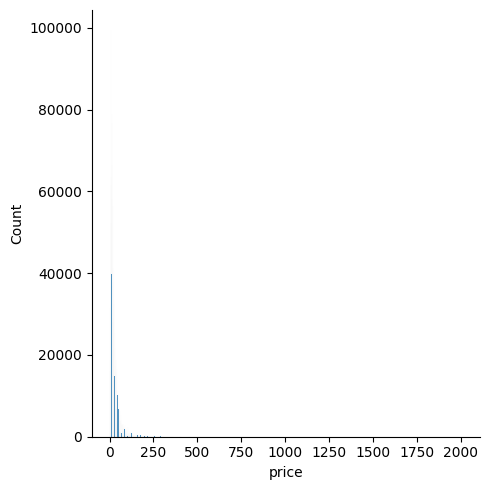

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.displot(y_train_df, kde=False)

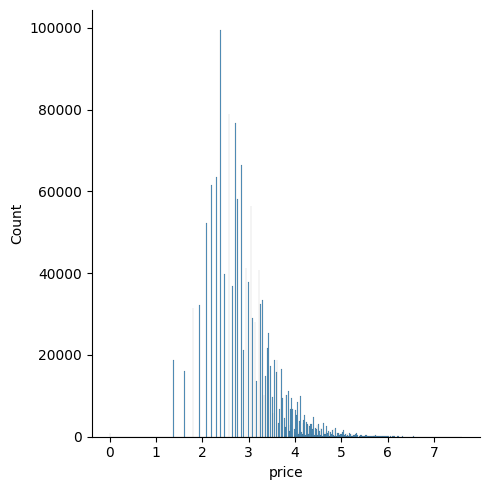

In [69]:
# check price log transformation distribution 
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.displot(y_train_df, kde=False)

In [70]:
# transform log 
mercari_df['price']=np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [71]:
print('shipping 값 유형: \n', mercari_df['shipping'].value_counts())
print('item condition id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

shipping 값 유형: 
 0    819435
1    663100
Name: shipping, dtype: int64
item condition id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


shipping>배송비유무로 균일, item_condition id 균일, 별도 설명이 없는 no description yet으로 되어있는 item_descrption의 값을 확인해보자

In [72]:
boolean_cond = mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

item description이 no description ye으로 되어있는게 80000건 정도로 null값처럼 의미없는 속성값이기 때문에 적절한 값을 ㅗ변경해야함.

category_name은 /로 분리된 카테고리를 하나의 문자여로 나타내는데, 이를 /로 분리해보자.

category_name 칼럼을 /를 기준으로 대 중 소분류를 효과적으로 분리해내기 위해 별도의 split_cat함수를 생성하고 이를 aaply lambda에 적용하자. category name칼럼은 null값을 6000여건 갖기 때문에 이를 유의해야하며 category name이 null일 경우 대중소분류 모두 other null값을 부여한다.

대중소칼럼은 mercari_dF > cat dae, cat jung, cat so로 부여한다.


In [73]:
# apply lambda 에서 호출되는 대중소분할 함수 생성, 리스트 변환
def split_cat(category_name):
  try:
    return category_name.split('/')
  
  except:
    return['Other_Null','Other_Null','Other_Null']

#with this plitcat, call them in apply lambda, make big, mid, small column in mercaroi_df
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so']=zip(*mercari_df['category_name'].apply(lambda x:split_cat(x)))
# 대분류만 값의 유형과 건수를 살펴보고 중분류 소분류는 분류개수만 추출
print('대분류 유형: \n', mercari_df['cat_dae'].value_counts())
print('중분류 유형: \n', mercari_df['cat_jung'].value_counts())
print('소분류 유형: \n', mercari_df['cat_so'].value_counts())


대분류 유형: 
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 유형: 
 Athletic Apparel        134383
Makeup                  124624
Tops & Blouses          106960
Shoes                   100452
Jewelry                  61763
                         ...  
Candles                     64
Ceramics and Pottery        57
Dolls and Miniatures        49
Books and Zines             46
Quilts                      31
Name: cat_jung, Length: 114, dtype: int64
소분류 유형: 
 Pants, Tights, Leggings       60177
Other                         50224
Face                          50171
T-Shirts                      46380
Shoes                         32168
                

대분류의 경우 여성 뷰티 키즈가많으며 중뷴류는 114개 소분류는 817개로 구성되어 ㅣ있다. 

마지막으로 bran_name, category_name, item_descfription의 null은 othernull로 일괄 변경하겠다.

브랜드이름은 바꾸고 싶지만 마땅한게 없으므로 other null로 변경한다.

In [74]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')
#column별 null값이 0이 되어야함
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

### 피처인코딩과 피처 벡터화

mercari price suggestion에 이용되는 데이터세트는 문자열 칼럼이 다수 존재한다. 이 문자열 칼럼 중 레이블 또는 원핫인코딩을 수행하거나 피처벡터화로 변환할 칼럼을 선별한다. 먼저 이 피치를 어떤 방식으로 변환할지 검토하고 추후 일괄적으로 같은 속성의 변환작업을 적용한다. 예측타겟은 Price로 회귀모델 기반이며 선혀오히귀와 회귀트리 모두 적용하며 선형회귀는 원핫인코딩을 적용한다. 피처벡터화는 짧은건 Count기반, 긴건 td idf 기반의 벡터화를 적용한다.

첫번째로 brand name이 어떤 유형으로 되어있는지 살펴보자


In [75]:
print('brand name 유형 건수: ', mercari_df['brand_name'].unique())
print('brand name sample \n', mercari_df['brand_name'].value_counts()[:5])

brand name 유형 건수:  ['Other_Null' 'Razer' 'Target' ... 'Astroglide' 'Cumberland Bay'
 'Kids Only']
brand name sample 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


brandname은 대부분 명료한 문자열로 피처벡터화없이 인코딩변환을 적용해 원핫인코딩으로 변환한다. 다음으로 상품명을 의미하는 name속성이 어떤 유형으로 이뤄졌는지 유형 건수와 상품명을 출력해보자.

In [76]:
print('name 유형 건수: ', mercari_df['name'].unique())
print('name sample \n', mercari_df['name'].value_counts()[:10])

name 유형 건수:  ['MLB Cincinnati Reds T Shirt Size XL' 'Razer BlackWidow Chroma Keyboard'
 'AVA-VIV Blouse' ... '21 day fix containers and eating plan'
 'World markets lanterns' 'Brand new lux de ville wallet']
name sample 
 Bundle                 2232
Reserved                453
Converse                445
BUNDLE                  418
Dress                   410
Coach purse             404
Lularoe TC leggings     396
Romper                  353
Nike                    340
Vans                    334
Name: name, dtype: int64


상품명은 name속성의 경우 종류가 매우 많다. 대부분 개별 고유상품명을 가지며 유형이 매우 많고 적은 단어 위주의 텍스트형태로 돼있으므로 count 기반으로 피 ㅓ벡터화 변환을 적용한다. category name 칼럼은 대중소분류된 그대로 원핫인코딩을 진행한다.
shipping은 배송비 무료여부로 두가지 유형의 값을 가지며 item condition은 상품상태로서 다섯가지 유형을 갖는데 모두 원핫인코딩을 적용한다.
다음으로 item description으로 상훔에 대한 간단 설명이다. 평균 문자열 크기와 2개정도의 텍스트만 추출해보자.

In [77]:
pd.set_option('max_colwidth', 200)

#item description의 평균 문자열 크기
print('item description average string length: ', mercari_df['item_description'].str.len().mean())
mercari_df['item_description'][:2]

item description average string length:  145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [78]:
# 주요 칼럼 피처 벡터화
# name 속성에 대한 피처벡터화
cnt_vect = CountVectorizer()
X_name = cnt_vect.fit_transform(mercari_df.name)

#item_descriptiion에 대한 피처벡터화 변환
tfidf_descp = TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape: ', X_name.shape)
print('item_description vectorization shape: ', X_descp.shape)

name vectorization shape:  (1482535, 105757)
item_description vectorization shape:  (1482535, 50000)


count vectorizer, tfidf vectorizer가 fit transform을 통해 반환하는 데이터는 희소행렬 형태로 희소행렬 객체변수인 X_name, X_descp를 새로 결합해 새 데이터 세트로 구성해야하고 앞으로 인코딩될 cat dae, jung ,so, brandname, shipping, item condition 모두 결합되 모델을 실행하는 기반 데이터 세트ㅗ 재구성되어야 한다.

이를 위해 인코딩 대상 칼럼도 밀집 행렬 형태가 아닌 희소행렬형태로 인코딩을 적용한 뒤 함께 결합하도록 한다. 사이킷런에서 제공하는 one hot encoder, labelbinarizer 클래스 중후자에서 sparse_out True를 설정하여 진행하고 개별 칼럼의 희소행렬은 saprse 의 hstack함수를 이용하여 결합하고자 한다.

In [79]:
from sklearn.preprocessing import LabelBinarizer

# brand name, item condition id, shipping > 희소 행렬 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat dae, jung, so 원핫인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_dae.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [80]:
#  check right transformation
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand_shape: {0}, X_item_cond id shape: {1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape: {0}, X_cat_dae id shape: {1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung: {0}, X_cat_so shape: {1}'.format(X_cat_jung.shape, X_cat_so.shape))


<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
X_brand_shape: (1482535, 4810), X_item_cond id shape: (1482535, 5)
X_shipping shape: (1482535, 1), X_cat_dae id shape: (1482535, 11)
X_cat_jung: (1482535, 114), X_cat_so shape: (1482535, 871)


인코딩 변환된 데이터 세트가 csr 형태로 변환된 csr matrix 타입이며 다수의 인코딩 칼럼을 가지게 된다.
이번에는 앞에서 피처벡터화 변환한 데이터 세트와 희소 인코딩 변환된 데이터세트를 이용해 모두 결합해보고자 한다.결합된 데이터는 메모리상 타입과 크기만 확인하고 삭제한다.

In [81]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung,X_cat_so)

# with hstack function, 데이터 세트 결합
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse),X_features_sparse.shape)

# delete it because of memory problem
del X_features_sparse
gc.collect()

<class 'scipy.sparse._csr.csr_matrix'> (1482535, 161569)


0

### 릿지회귀 모델 구축 및 평가

모델을 평가하는 평가로직 함수화를 진행한다. RMSLE 방식으로 RMSE에서 오류값에 로그를 취함으로서 큰 값에서 오류가발생할 경우 가중치를 두는 것을 방지학 ㅣ위함이다.

한가지 주의해야할 것은 가격값은 로그값이 취해져있기 때문에 최종 예측값도 로그변환된 값으로 값을 얻기 위해서는 exp 변환해주어야 한다.

In [82]:
def rmsle(y, y_pred):
  return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y_pred),2)))

def evaluate_org_price(y_test, preds):
  preds_exmpm = np.expm1(preds)
  y_test_exmpm = np.expm1(y_test)

  #extraction rmsle
  rmsle_result = rmsle(y_test_exmpm,preds_exmpm)
  return rmsle_result

In [83]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
  X=hstack(matrix_list).tocsr()

  X_train, X_test, y_train, y_test= train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)

  model.fit(X_train,y_train)

  preds = model.predict(X_test)
  del X,X_train,X_test, y_train
  gc.collect()

  return preds,y_test

In [84]:
#regression predict with ridge
#before prediction, how text affect
linear_model = Ridge(solver='lsqr', fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list = sparse_matrix_list) 
print('item description을 제했을 때 rmsle: ', evaluate_org_price(y_test,linear_preds))

sparse_matrix_list = (X_descp,X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list = sparse_matrix_list) 
print('item description을 포함할 때 rmsle: ', evaluate_org_price(y_test,linear_preds))



item description을 제했을 때 rmsle:  0.4983990938999374
item description을 포함할 때 rmsle:  0.4680329023962086


### lightgbm 회귀모델 구축과 앙상블을 이용한 최종 예측평가


In [ ]:
from lightgbm import LGBMRegressor
sparse_matrix_list = (X_descp,X_name, X_brand,X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model=lgbm_model, matrix_list = sparse_matrix_list) 
print('lgbm rmsle: ', evaluate_org_price(y_test,lgbm_preds))


예측성능이 개선되었다. 다음으로 위의 결과에서 ridge의 결과값을 서로 앙상블해 최종 예측값을 도출해보자.

In [ ]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('light gbm & ridge ensembgel final rmsle :', evaluate_org_price(y_test, preds))

## 11 정리

이 장에서는 텍스트분석을 위한 기반 프로세스를 상세히 알아보고 이를 통해 텍스트분류, 감성분석, 토픽 모델링, 텍스트군비화 및 유사도 측정 등을 구현하였다.

텍스트 정규화작업은 텍스트 클렌징 및 대소문자 변경 단어토큰화 의미없는 단어 필터링, 어근 추출 등 피처 벡터화를 진행하기 이전에 수행하는 다양한 사전 작업을 의미한다. 피처벡터화는 bow으 ㅣ대표방식인 counT와 tfidf 기반의 피처벡터화를 설명했다. 일반적으로 후자가 더욱 도움이 되며 이렇게 생성된 것은 희소행렬이다.

텍스트 분류절에서는 문서들을 피처벡엍화한 후 로지스틱 회귀를 적용해 문서들을 지도학습 방식으로 예측분류하였다. 감성 분석절에서는 지도학습 기반으로 긍정/붕정 이진 분류를 적용한 방식과 sentiwordnet, vader와 같은 lexicon을 이용한 방식 두가지를 살펴보았따. 토픽모델링은 lda를 이용해 뉴스그룹의 토픽들을 추출해보고 텍스트 군집화는 Kmeans 군집화를 이용해예측분류하였다. 텍스트 유사도는 코사인 유사도를 이용하였으며 파이썬의 대표 한글 형태소 분석기 konlpy 패키지를 이용, 리뷰 긍정 부정 이진분류를 적용하였다.
